<a href="https://colab.research.google.com/github/nikhilsinghh59/SHALA2020/blob/master/Assignment_ML_L2_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [67]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
titanic_data.shape

(891, 12)

In [69]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [0]:
titanic = titanic_data.drop(['Cabin' , 'Name' ,'Ticket'] , axis=1)

In [71]:
print(titanic.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [72]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [74]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


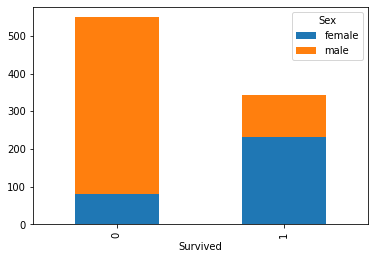

In [75]:
sex = pd.crosstab(titanic.Survived , titanic.Sex)
sex.plot.bar(stacked=True)

plt.legend(title = 'Sex')
plt.show()

S    646
C    168
Q     77
Name: Embarked, dtype: int64


[]

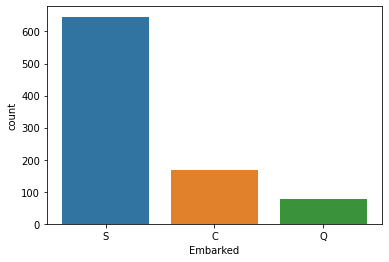

In [96]:
print(titanic['Embarked'].value_counts())

sns.countplot(x='Embarked' , data = titanic)
plt.plot()

In [86]:
df = pd.get_dummies(data = titanic , prefix = 'Embarked' , drop_first=False)

df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_female,Embarked_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


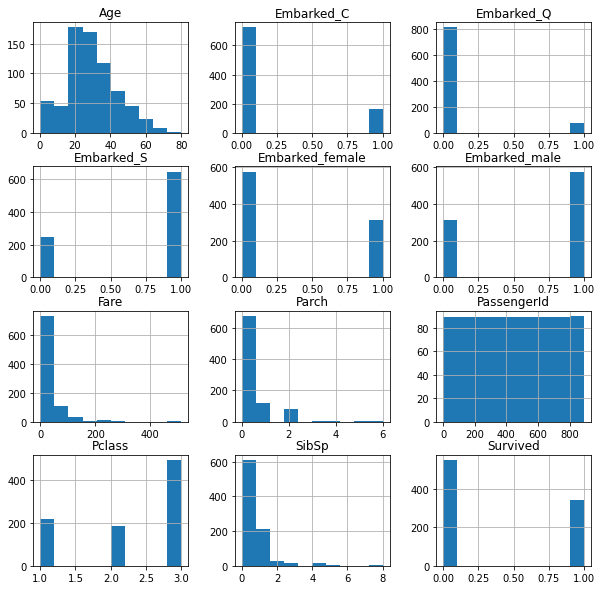

In [87]:
df.hist(figsize=(10 , 10))
plt.show()

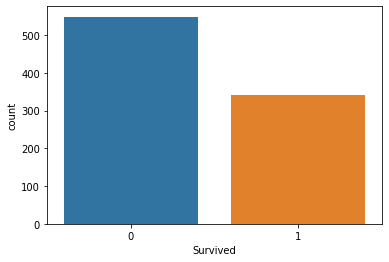

In [79]:
sns.countplot(x=df['Survived'])
plt.show()

[]

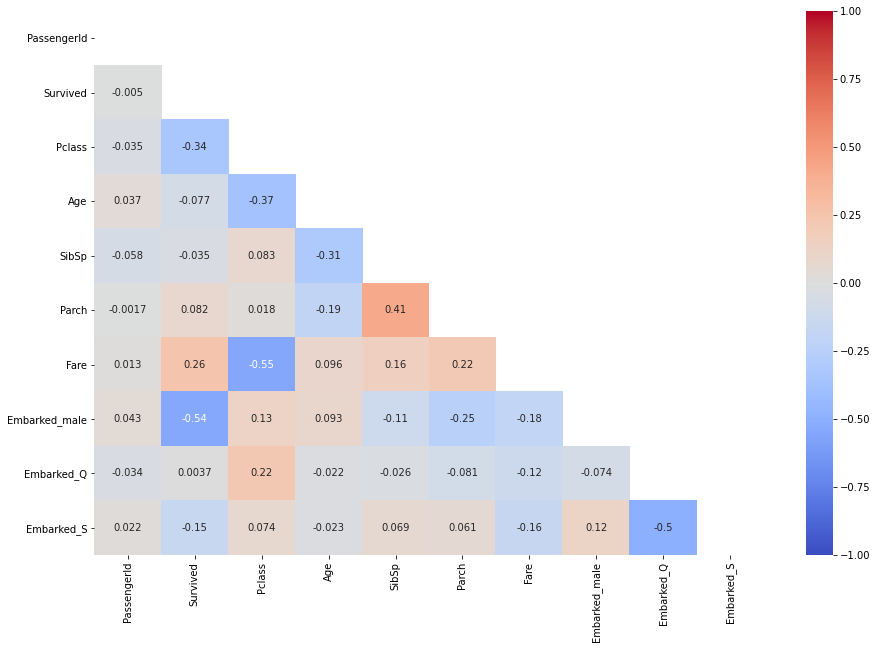

In [80]:
plt.figure(figsize=(15 , 10))

mask = np.zeros_like(df.corr() , dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr() , vmin =-1 , cmap = 'coolwarm' , annot=True , mask = mask)

plt.plot()

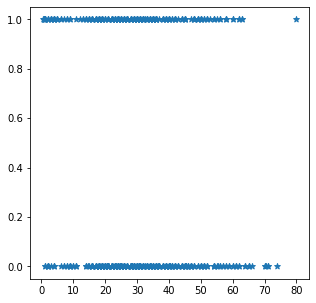

In [84]:
## scatter

plt.figure(figsize=(5 , 5))

plt.scatter(x=df['Age'] , y = df['Survived'] , marker='*')
plt.show()

In [85]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked_male  891 non-null    uint8  
 8   Embarked_Q     891 non-null    uint8  
 9   Embarked_S     891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


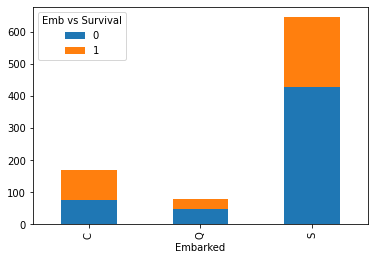

In [88]:
# Embarked vs Survived

emb = pd.crosstab(titanic.Embarked , titanic.Survived)
emb.plot.bar(stacked=True)
plt.legend(title='Emb vs Survival')
plt.show()


In [92]:
titanic['Fare'].groupby(titanic['Embarked']).mean()

Embarked
C    59.954144
Q    13.276030
S    27.243651
Name: Fare, dtype: float64

In [94]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [95]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

[]

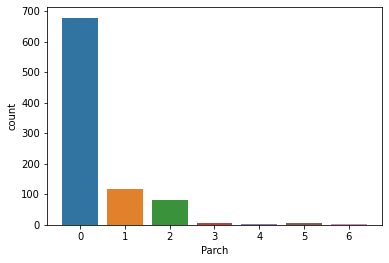

In [97]:
sns.countplot(x = 'Parch' , data=df)
plt.plot()

In [0]:
# Loading the machine learning packages
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn import preprocessing

In [0]:
## splitting of data

Y = df['Survived']
X = df.drop(['Survived'] , axis=1)

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , train_size=0.80, random_state=123)

In [100]:
print(X_train.shape)
print(X_test.shape)

(712, 11)
(179, 11)


In [0]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [104]:
X_train[ : 5]

array([[-0.44721769, -1.59969583, -0.96699323, -0.46010259,  0.82958824,
         0.49041999,  1.35523186, -1.35523186,  2.13600094, -0.32229795,
        -1.62827579],
       [ 1.19468157,  0.81596362,  0.0815859 , -0.46010259, -0.47431204,
        -0.47216828, -0.73788112,  0.73788112, -0.46816459,  3.10271908,
        -1.62827579],
       [-0.93978747,  0.81596362,  1.0952124 , -0.46010259, -0.47431204,
        -0.48222934, -0.73788112,  0.73788112,  2.13600094, -0.32229795,
        -1.62827579],
       [-0.08756357,  0.81596362, -0.61746686, -0.46010259, -0.47431204,
        -0.47248832, -0.73788112,  0.73788112, -0.46816459,  3.10271908,
        -1.62827579],
       [-1.35417157, -1.59969583, -0.4776563 , -0.46010259,  0.82958824,
         0.59350463, -0.73788112,  0.73788112,  2.13600094, -0.32229795,
        -1.62827579]])

In [0]:
def model_performance(model , X_test , Y_test):

  predictions = model.predict(X_test)
  accuracy = accuracy_score(Y_test , predictions)
  print(confusion_matrix(Y_test , predictions))
  print("="*60)
  print(classification_report(Y_test , predictions))


In [0]:
model_name = {0: 'Logistic Regression' , 
          1 : 'Randomforest Classifier' , 
          2 :'K Nearest Neighbours', 
          3 : 'XGBoost',
          4 : 'ADABoost'
          }

In [0]:
def models_build(X_train , Y_train , model_name , X_test , Y_test):

  i=0
  # Logistic Regression model
  print("Peformance of model " , model_name[i])
  lr = LogisticRegression()
  lr.fit(X_train , Y_train)

  model_performance(lr , X_test , Y_test)
  i+=1

  #model.append(lr)

  # Random Forest Classifier
  print("Peformance of model " , model_name[i])
  rf_class = RandomForestClassifier()
  rf_class.fit(X_train , Y_train)

  model_performance(rf_class , X_test , Y_test)

  i+=1

  #model.append(rf_class)

  # knn classifier
  print("Peformance of model " , model_name[i])
  knn = KNeighborsClassifier(n_neighbors=11)
  knn.fit(X_train , Y_train)

  model_performance(knn , X_test , Y_test)

  i+=1

  #model.append(knn)

  # Xg boost
  print("Peformance of model " , model_name[i])
  xgb_class = XGBClassifier()
  xgb_class.fit(X_train , Y_train)

  model_performance(xgb_class , X_test , Y_test)

  i+=1

  #model.append(xgb_class)

  # Adaboost Classifier
  print("Peformance of model " , model_name[i])
  ada = AdaBoostClassifier(learning_rate = 1)
  ada.fit(X_train , Y_train)

  model_performance(ada , X_test , Y_test)

  i+=1

  #model.append(ada)

  return

In [0]:
models_build(X_train , Y_train , model_name , X_test , Y_test)